## 곡의 note embedding을 이용해 주요 구절을 추출하는 모델

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import os

In [3]:
from google.colab import drive

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import skipgrams

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import pickle

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Project/code/songs

/content/drive/MyDrive/Colab Notebooks/Project/code/songs


In [ ]:
with open('./note_embeddings.pickle' , 'rb') as f:
  note_embedding = pickle.load(f)

## 곡의 note를 구절 단위로 리스트화

In [ ]:
# 코드로 작성 필요
sentences = [['B-3.D4.E4.B-4.G3.E3.D3.G2',
 'A4.E4.C#4.A3.E3.A2',
 'F4.D4.A3.D3.D2',
 'B-3.D4.G4.G2.D3',
 'A3.D4.F4.D2.D3',
 'A3.D4.F4',
 'A2',
 'B2',
 'C#3',
 'A3.D4.F4',
 'D3',
 'C3',
 'B-2',
 'A2',
 'B-2',
 'A2',
 'G2',
 'F2',
 'A3.C4.F4.A4.F3.C3.F2',
 'G4.D4.B-3.G3.D3.G2'],
 ['C#4.E4.A3.E3.A2',
 'A3.F3.D4.F4.D2.A2',
 'E3.A3.C#4.E4.A1.A2',
 'E3.A3.C#4.E4',
 'E2',
 'F2',
 'G2',
 'E3.A3.C#4.E4',
 'A2',
 'G2',
 'F2',
 'E2',
 'F2',
 'E2'],
 ['D2',
 'C#2',
 'F3.D4.D2',
 'F3',
 'D4.F4',
 'B-2.B-1',
 'E4.C#4',
 'F4.D4',
 'A2.A1',
 'B-3',
 'F1.F2',
 'A3',
 'F3',
 'B-3.C#4.G2.G1',
 'G3'],
 ['A3.F3.D4.A2.D2',
 'F3',
 'D4.F4',
 'B-2.B-1',
 'E4.C#4',
 'F4.D4',
 'A2.A1',
 'B-3',
 'F1.F2',
 'A3',
 'F3'],
 ['B-3.C#4.G2.G1',
 'G3',
 'A3.F3.D4.A2.D2',
 'E4.A3.G3',
 'D3',
 'C#3',
 'F4.A3.F3',
 'D3',
 'C#3',
 'D3',
 'C#3',
 'D3'],
 ['C3',
 'C4.D4.F#4',
 'B-2',
 'A2',
 'G4.D4.B-3',
 'G2',
 'F2',
 'G#4',
 'D4.B3.E2',
 'A4',
 'G#4.D4.B3.F3',
 'A2',
 'A3.C#4.A4.E3'],
 ['B-3.D4.E4.B-4.G3.E3.D3.G2',
 'A4.E4.C#4.A3.E3.A2',
 'F4.D4.A3.D3',
 'B-3.D4.G4.G2.D3',
 'A3.D4.F4.D2.D3',
 'A3.D4.F4',
 'A2',
 'B2',
 'C#3',
 'A3.D4.F4',
 'D3',
 'C3',
 'B-2',
 'A2',
 'B-2',
 'A2',
 'G2',
 'F2',
 'A3.C4.E-4.A4.E-3.F#2',
 'G4.D4.B-3.G3.D3.G2',
 'C#4.E4.A3.E3.A2',
 'A3.F3.D4.F4.D2.A2',
 'E3.A3.C#4.E4.A1.A2',
 'E3.A3.C#4.E4',
 'E2',
 'F2'],
 ['G2',
 'E3.A3.C#4.E4',
 'A2',
 'G2',
 'F2',
 'E2',
 'F2',
 'E2',
 'D2',
 'C#2',
 'F3.D4.D2',
 'F3',
 'D4.F4',
 'B-2.B-1',
 'E4.C#4',
 'F4.D4',
 'A2.A1',
 'B-3'],
#  'F1.F2',
#  'A3',
#  'F3',
#  'B-3.C#4.G2.G1',
#  'G3',
#  'A3.D4',
#  'F3',
#  'A2.D2',
#  'E4.C#4',
#  'F3',
#  'D4.F4',
#  'B-2.B-1',
#  'E4.C#4',
#  'F4.D4',
#  'A2.A1',
#  'B-3',
#  'F1.F2',
#  'A3',
#  'F3',
#  'B-3.C#4.G2.G1',
#  'G3',
#  'A3.F3.D4.A2.D2',
#  'A2',
#  'B2',
#  'C#3',
#  'E4.A3.G3.D3',
#  'C#3',
#  'F4.A3.F3',
#  'D3',
#  'C#3',
#  'D3',
#  'C#3',
#  'D3',
#  'C3',
#  'C4.D4.F#4',
#  'B-2',
#  'A2',
#  'G4.D4.B-3',
#  'G2',
#  'E2',
#  'A4.D4.A3.F2',
#  'C#5.G4.C#4.A2.G3.E3',
#  'D4.F4.A4.D5.D2.A2.F3',
#  'B-3.D4.E4.B-4.G3.E3.D3.G2',
#  'A4.E4.C#4.A3.E3.A2',
#  'F4.D4.A3.D3.D2',
#  'B-3.D4.G4.G2.D3',
#  'A3.D4.F4.D2.D3',
#  'A3.D4.F4',
#  'A2',
#  'B2',
#  'C#3',
#  'A3.D4.F4',
#  'D3',
#  'C3',
#  'B-2',
#  'A2',
#  'B-2',
#  'A2',
#  'G2',
#  'F2',
#  'A3.C4.F4.A4.F3.C3.F2',
#  'G4.D4.B-3.G3.D3.G2',
#  'C#4.E4.A3.E3.A2',
#  'A3.F3.D4.F4.D2.A2',
#  'E3.A3.C#4.E4.A1.A2',
#  'E3.A3.C#4.E4',
#  'E2',
#  'F2',
#  'G2',
#  'E3.A3.C#4.E4',
#  'A2',
#  'G2',
#  'F2',
#  'E2',
#  'F2',
#  'E2',
#  'D2',
#  'C#2',
#  'F3.D4.D2',
#  'F3',
#  'D4.F4',
#  'B-2.B-1',
#  'E4.C#4',
#  'F4.D4',
#  'A2.A1',
#  'B-3',
#  'F1.F2',
#  'A3',
#  'F3',
#  'B-3.C#4.G2.G1',
#  'G3',
#  'A3.F3.D4.A2.D2']
]

## 구절의 벡터 평균 계산

In [ ]:
embedding_dim = 200
zero_vector = np.zeros(embedding_dim)

def calculate_sentence_vector(sentence):
  sum = np.zeros(embedding_dim)
  for note in sentence :
    if len(sentence) != 0 and note in note_embedding.keys():
      sum += note_embedding[note]
    else : 
      sum += zero_vector

  return sum /len(sentence)

In [ ]:
def sentences_to_vectors(sentences) :
  return [calculate_sentence_vector(sentence) for sentence in sentences]

## 유사도 행렬

In [ ]:
def similarity_matrix(sentence_embedding) :
  sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])

  for i in range(len(sentence_embedding)):
    for j in range(len(sentence_embedding)):
      sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, embedding_dim),
                                        sentence_embedding[j].reshape(1, embedding_dim))[0,0]
  return sim_mat 

## 유사도를 그림으로 표현

In [ ]:
def draw_graphs(sim_matrix):
  nx_graph = nx.from_numpy_array(sim_matrix)
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(nx_graph)
  nx.draw(nx_graph, with_labels=True, font_weight='bold')
  nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
  plt.show()

## 유사도 점수 계산

In [ ]:
def calculate_score(sim_matrix):
  nx_graph = nx.from_numpy_array(sim_matrix)
  scores = nx.pagerank(nx_graph)
  return scores

In [ ]:
# 리스트 flatten 함수 정의
def flat_list(array): 
  a=[]
  for i in array:
    if type(i) == type(list()):
      a+=(flat_list(i))
    else:
      a.append(i)
  return a

## 점수가 가장 높은 구절 반환

In [ ]:
def ranked_sentences(sentences, scores, n=3):
  top_scores = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
  top_n_sentences = [sentence for score,sentence in top_scores[:n]]
  # top_n_sentences = flat_list(top_n_sentences)
  return top_n_sentences

## 실행

In [ ]:
sentence_embedding = sentences_to_vectors(sentences)

In [ ]:
sim_matrix = similarity_matrix(sentence_embedding)

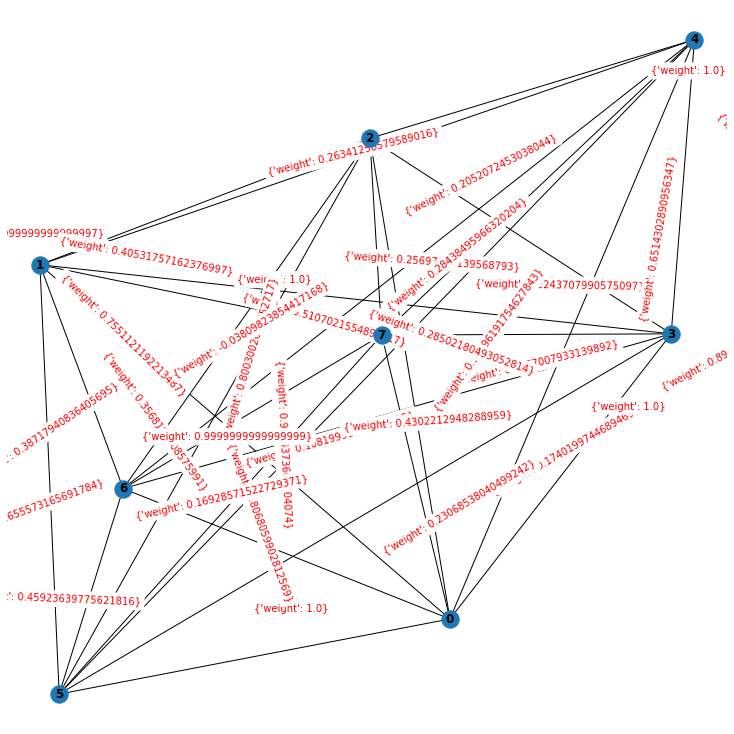

In [ ]:
draw_graphs(sim_matrix)

In [ ]:
scores = calculate_score(sim_matrix)
final = ranked_sentences(sentences, scores, n = 1)

In [ ]:
with open('note_to_int.pickle' , 'rb') as f:
  note_to_int = pickle.load(f)

In [ ]:
final = flat_list(final)

In [ ]:
int_list = []
for note in final:
  int_list.append(note_to_int[note])
print(int_list)

[1974, 1267, 3, 1974, 1571, 1260, 1571, 1260, 867, 521, 1604, 1577, 933, 185, 1309, 1659, 4, 198]


## 결과 확인

In [ ]:
a = open('/content/idx2pos.pkl', 'rb')
voca = pickle.load(a)

real_sentence = ""
for int in int_list:

  try:
    int = int(int)
  except: pass

  if voca.get(int):
    if voca[int] == "UNK":
      break
    real_sentence += voca[int] + " "

print(real_sentence)

상한 눈물 의 상한 불사 자비 불사 자비 하면서 품 수만 잠기 가까이 피 무조건 줌 는 여기 
